In [2]:
import os
import pandas as pd
import hvplot.pandas
import seaborn as sns
from pathlib import Path
import csv
import matplotlib.pyplot as plt

In [10]:
home_path = '../Resources/Zillow Cleaned up/one_bedroom_by_date.csv'
fed_path = '../Resources/FRED corrected dates/total_assets.csv'
print(home_path)

../Resources/Zillow Cleaned up/one_bedroom_by_date.csv


In [11]:
def read_concat(home_path, fed_path):
    df1 = pd.read_csv(home_path)
    df2 = pd.read_csv(fed_path)
    
    df1['date'] = pd.to_datetime(df1['date'])
    columns_to_keep = ['date', 'New York, NY', 'Los Angeles, CA', 'Houston, TX', 'Chicago, IL', 'San Antonio, TX', 'Philadelphia, PA', 'Phoenix, AZ', 'Las Vegas, NV', 'San Diego, CA', 'Dallas, TX']
    df1 = df1[columns_to_keep]
    renamed = ['Date', 'New York, NY', 'Los Angeles, CA', 'Houston, TX', 'Chicago, IL', 'San Antonio, TX', 'Philadelphia, PA', 'Phoenix, AZ', 'Las Vegas, NV', 'San Diego, CA', 'Dallas, TX']
    df1.columns = renamed
    df1.set_index('Date', inplace=True)
    
    df2['date'] = pd.to_datetime(df2['date'])
    fed_c = ['Date', 'Total_Assets']
    df2.columns = fed_c
    
    one_day = pd.Timedelta(days=1)  # Create a Timedelta representing one day
    df2['Date'] = df2['Date'] - one_day # Subtract one day from fed balance sheet dates
    df2.set_index('Date', inplace=True)
    
    concat = pd.concat([df2, df1], axis='columns', join='inner')
    return concat
onebr = read_concat(home_path, fed_path)
onebr.head()

,Total_Assets,"New York, NY","Los Angeles, CA","Houston, TX","Chicago, IL","San Antonio, TX","Philadelphia, PA","Phoenix, AZ","Las Vegas, NV","San Diego, CA","Dallas, TX"
Date,,,,,,,,,,,
2002-11-30,NaN,89919.299146,161037.768251,51881.576888,92973.450282,38886.532403,86816.689228,68360.734855,86231.931717,165833.613683,43711.194013
2002-12-31,724718.0,91009.196650,163641.759585,51907.377046,93537.996810,39059.752508,87834.146417,68609.154395,86549.444913,169103.115611,43812.943238
2003-01-31,721326.0,92079.252343,165893.940050,52297.692416,94027.583886,39012.991355,88808.682752,68819.045814,86975.958677,172083.125428,43805.040956
2003-02-28,723651.0,93182.197507,167989.695287,52220.312777,94604.684347,38876.957611,89736.581235,69039.833175,87616.643478,174892.007765,43897.830771
2003-03-31,736926.0,94341.250017,170251.508735,52348.522755,95156.378359,38867.628926,90630.395469,69269.787028,88298.444815,177715.717768,44299.488853


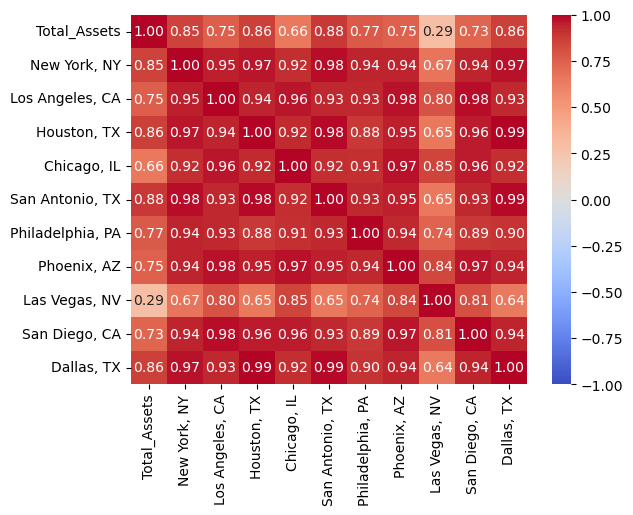

In [12]:
def seaborn(df, name):
    import matplotlib.pyplot as plt
    price_correlation = df.corr()
    sns.heatmap(price_correlation, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
    plt.savefig(name, dpi=300)
    
seaborn(onebr, 'seaborn Metro 1BR vs Fed.png')

In [13]:
home_path = '../Resources/Zillow Cleaned up/two_bedroom_by_date.csv'
fed_path = '../Resources/FRED corrected dates/total_assets.csv'
print(home_path)

../Resources/Zillow Cleaned up/two_bedroom_by_date.csv


In [14]:
def read_concat(home_path, fed_path):
    df1 = pd.read_csv(home_path)
    df2 = pd.read_csv(fed_path)
    
    df1['date'] = pd.to_datetime(df1['date'])
    columns_to_keep = ['date', 'New York, NY', 'Los Angeles, CA', 'Houston, TX', 'Chicago, IL', 'San Antonio, TX', 'Philadelphia, PA', 'Phoenix, AZ', 'Las Vegas, NV', 'San Diego, CA', 'Dallas, TX']
    df1 = df1[columns_to_keep]
    renamed = ['Date', 'New York, NY', 'Los Angeles, CA', 'Houston, TX', 'Chicago, IL', 'San Antonio, TX', 'Philadelphia, PA', 'Phoenix, AZ', 'Las Vegas, NV', 'San Diego, CA', 'Dallas, TX']
    df1.columns = renamed
    df1.set_index('Date', inplace=True)
    
    df2['date'] = pd.to_datetime(df2['date'])
    fed_c = ['Date', 'Total_Assets']
    df2.columns = fed_c
    
    one_day = pd.Timedelta(days=1)  # Create a Timedelta representing one day
    df2['Date'] = df2['Date'] - one_day # Subtract one day from fed balance sheet dates
    df2.set_index('Date', inplace=True)
    
    concat = pd.concat([df2, df1], axis='columns', join='inner')
    return concat
twobr = read_concat(home_path, fed_path)
twobr.head()

,Total_Assets,"New York, NY","Los Angeles, CA","Houston, TX","Chicago, IL","San Antonio, TX","Philadelphia, PA","Phoenix, AZ","Las Vegas, NV","San Diego, CA","Dallas, TX"
Date,,,,,,,,,,,
2002-11-30,NaN,177276.989523,242593.076344,63676.237323,116885.201897,52701.527377,108289.815706,127871.856078,130625.014099,252840.130094,70131.648852
2002-12-31,724718.0,179587.008924,246172.585511,63835.182859,117597.775231,52808.070176,109393.307477,128381.030121,131432.092057,257116.892723,70371.332142
2003-01-31,721326.0,181857.867659,249179.784795,64088.588534,118153.264304,52819.716343,110438.141509,128848.593368,132262.126896,260911.069442,70562.477205
2003-02-28,723651.0,184159.788632,251987.933764,64140.230395,118829.806246,52695.987821,111439.691976,129354.589772,133078.942996,264586.506068,70741.782798
2003-03-31,736926.0,186542.595704,255057.569999,64285.003153,119445.213225,52594.675125,112405.711781,129822.464549,133940.677790,268489.227865,71021.963843


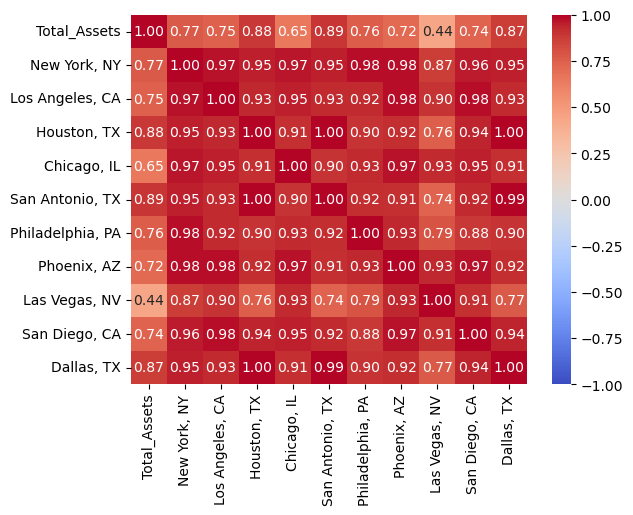

In [15]:
def seaborn(df, name):
    import matplotlib.pyplot as plt
    price_correlation = df.corr()
    sns.heatmap(price_correlation, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
    plt.savefig(name, dpi=300)
    
seaborn(twobr, 'seaborn Metro 2BR vs Fed.png')